In [1]:
import pandas as pd
import numpy as np
import os
import nltk as nltk

In [2]:
dir_path = '../google_data/NLP_data/'

In [47]:
data_path = os.path.join(dir_path, 'MEDICAL.csv')
data_rev = pd.read_csv(data_path)
print(data_rev.shape)
data_rev.head()

(2234, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000
1,1800 Contacts - Lens Store,It's expensive I expected (I thought I'd savin...,Negative,-0.300000,0.500000
2,1800 Contacts - Lens Store,Super fast navigation brand fast/easy checkout...,Positive,0.266667,0.633333
3,1800 Contacts - Lens Store,Easy step step process correct information too...,Positive,0.433333,0.833333
4,1800 Contacts - Lens Store,Placing order easy especially paper copy Rx. I...,Positive,0.216667,0.916667


In [48]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [49]:
data = data_rev[['Sentiment','Translated_Review']]

data = data[data.Sentiment!= 'NaN']

train, test = train_test_split(data,test_size = 0.1)

train_pos = train[train.Sentiment == 'Positive']
train_pos = train_pos[['Translated_Review']]
train_neg = train[train.Sentiment == 'Negative']
train_neg = train_neg[['Translated_Review']]

test_pos = test[ test['Sentiment'] == 'Positive']
test_pos = test_pos['Translated_Review']
test_neg = test[ test['Sentiment'] == 'Negative']
test_neg = test_neg['Translated_Review']

Positive words


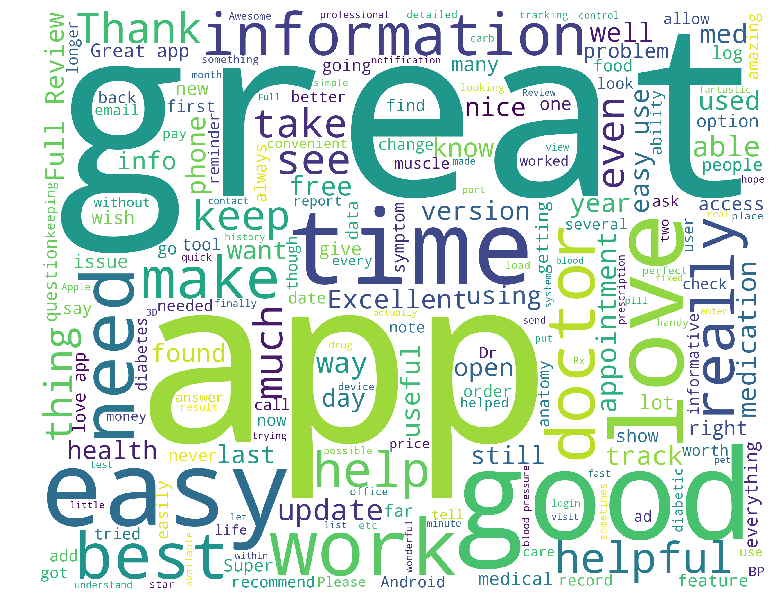

Negative words


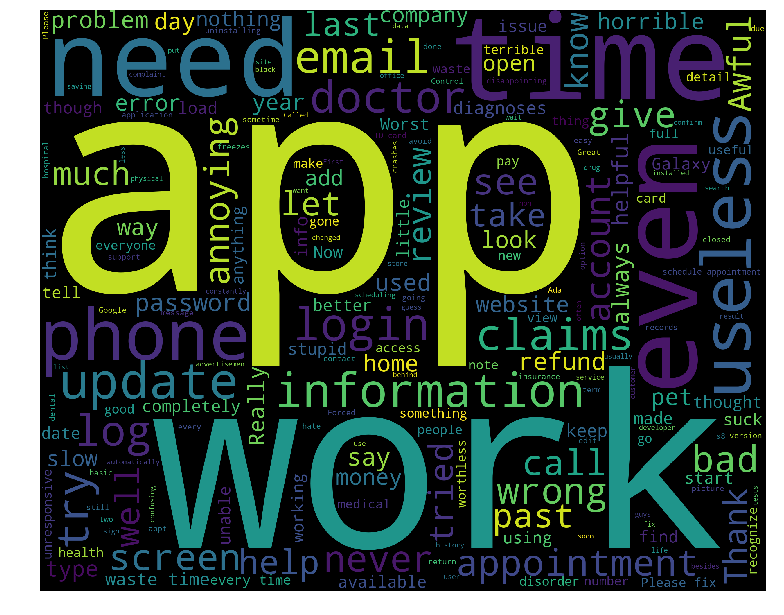

In [50]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos.Translated_Review,'white')
print("Negative words")
wordcloud_draw(train_neg.Translated_Review)